# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Print the list of cities 
cities

['atuona',
 'ekimchan',
 'callaway',
 'santa lucia',
 'new norfolk',
 'bredasdorp',
 'yellowknife',
 'puerto ayora',
 'rikitea',
 'murchison',
 'vieques',
 'taolanaro',
 'chokurdakh',
 'nerchinskiy zavod',
 'norman wells',
 'nogliki',
 'kapaa',
 'bilma',
 'santa maria',
 'khatanga',
 'udarnyy',
 'kyabram',
 'huarmey',
 'pacific grove',
 'tasiilaq',
 'snezhnogorsk',
 'illoqqortoormiut',
 'mataura',
 'coswig',
 'butaritari',
 'valdivia',
 'cap malheureux',
 'busselton',
 'kaitangata',
 'san jose',
 'lazaro cardenas',
 'jamestown',
 'pangkalanbuun',
 'port keats',
 'dugna',
 'murdochville',
 'vorontsovka',
 'grand gaube',
 'amalapuram',
 'beringovskiy',
 'punta arenas',
 'avarua',
 'tuatapere',
 'abnub',
 'ustka',
 'souillac',
 'marsh harbour',
 'barrow',
 'raudeberg',
 'hobart',
 'kuching',
 'riaba',
 'saint-pierre',
 'rocha',
 'khandyga',
 'hithadhoo',
 'longyearbyen',
 'staryy krym',
 'utete',
 'chulman',
 'mys shmidta',
 'skjaerhollen',
 'thompson',
 'bluff',
 'ondarroa',
 'egvekinot'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API call using imperial unit of measurement 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# add empty lists to store data
clouds = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_spd = []
city_name = []

x = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. if it fails, the iteration will continue
    try:
        
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_spd.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {x}|{city}")
        x+=1
    except (KeyError):
        print("City Not Found -- skipping.")

Processing record 1|atuona
Processing record 2|ekimchan
Processing record 3|callaway
Processing record 4|santa lucia
Processing record 5|new norfolk
Processing record 6|bredasdorp
Processing record 7|yellowknife
Processing record 8|puerto ayora
Processing record 9|rikitea
Processing record 10|murchison
Processing record 11|vieques
City Not Found -- skipping.
Processing record 12|chokurdakh
Processing record 13|nerchinskiy zavod
Processing record 14|norman wells
Processing record 15|nogliki
Processing record 16|kapaa
Processing record 17|bilma
Processing record 18|santa maria
Processing record 19|khatanga
Processing record 20|udarnyy
Processing record 21|kyabram
Processing record 22|huarmey
Processing record 23|pacific grove
Processing record 24|tasiilaq
Processing record 25|snezhnogorsk
City Not Found -- skipping.
Processing record 26|mataura
Processing record 27|coswig
Processing record 28|butaritari
Processing record 29|valdivia
Processing record 30|cap malheureux
Processing record 3

City Not Found -- skipping.
Processing record 246|nemuro
Processing record 247|abonnema
Processing record 248|provideniya
Processing record 249|morros
Processing record 250|cubara
Processing record 251|sun city west
Processing record 252|cooma
Processing record 253|brora
Processing record 254|mana
City Not Found -- skipping.
City Not Found -- skipping.
Processing record 255|sorland
Processing record 256|hamilton
City Not Found -- skipping.
Processing record 257|hirara
Processing record 258|yar-sale
Processing record 259|natal
Processing record 260|mehamn
Processing record 261|kedgwick
Processing record 262|mildura
Processing record 263|wewak
Processing record 264|tambopata
Processing record 265|gornyak
Processing record 266|nha trang
Processing record 267|osypenko
Processing record 268|luganville
Processing record 269|marystown
Processing record 270|urucara
Processing record 271|namibe
Processing record 272|ulladulla
Processing record 273|gamboma
Processing record 274|orlik
City Not Fo

Processing record 493|korla
Processing record 494|alofi
Processing record 495|shchors
Processing record 496|biak
City Not Found -- skipping.
Processing record 497|vestmannaeyjar
Processing record 498|hervey bay
Processing record 499|lensk
Processing record 500|ushibuka
Processing record 501|verkhnevilyuysk
Processing record 502|matagami
Processing record 503|mulchen
Processing record 504|dawei
City Not Found -- skipping.
Processing record 505|moose jaw
Processing record 506|petropavlovsk-kamchatskiy
Processing record 507|marienburg
Processing record 508|pemba
Processing record 509|vila do maio
Processing record 510|lodwar
Processing record 511|tabou
Processing record 512|college
Processing record 513|hambantota
Processing record 514|saint-leu
Processing record 515|neya
Processing record 516|denpasar
Processing record 517|itarema
Processing record 518|axim
Processing record 519|lewistown
Processing record 520|zacualtipan
Processing record 521|manaira
Processing record 522|arlit
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Creating city dataframe
cities = pd.DataFrame({"City":city_name, 
                        "Clouds":clouds, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_spd
                                         })
city_df = cities.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("..//output_data//city.csv")

#Displaying dataframe
city_df

,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Atuona,39,PF,1659581876,81,-9.8000,-139.0333,77.27,17.78
1,Ekimchan,64,RU,1659582065,57,53.0667,132.9667,74.89,1.30
2,Callaway,48,US,1659582066,81,30.1530,-85.5699,81.00,4.99
3,Santa Lucía,20,ES,1659581975,83,27.9117,-15.5407,64.76,29.93
4,New Norfolk,4,AU,1659581890,71,-42.7826,147.0587,64.92,3.00
...,...,...,...,...,...,...,...,...,...
574,Sinop Province,0,TR,1659582215,88,41.7711,34.8709,61.90,2.68
575,Calvinia,5,ZA,1659582215,97,-31.4707,19.7760,45.00,3.65
576,Kupang,74,ID,1659582216,53,-10.1667,123.5833,83.88,8.95


In [5]:
print(len(city_df))

579


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
High_humid = city_df.loc[(city_df['Humidity']>=100)]

print(len(High_humid))

9


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data=pd.merge(city_df,High_humid, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
print(len(clean_city_data))


570


In [8]:
clean_city_data

,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,39,PF,1659581876,81,-9.8000,-139.0333,77.27,17.78
1,Ekimchan,64,RU,1659582065,57,53.0667,132.9667,74.89,1.30
2,Callaway,48,US,1659582066,81,30.1530,-85.5699,81.00,4.99
3,Santa Lucía,20,ES,1659581975,83,27.9117,-15.5407,64.76,29.93
4,New Norfolk,4,AU,1659581890,71,-42.7826,147.0587,64.92,3.00
...,...,...,...,...,...,...,...,...,...
574,Sinop Province,0,TR,1659582215,88,41.7711,34.8709,61.90,2.68
575,Calvinia,5,ZA,1659582215,97,-31.4707,19.7760,45.00,3.65
576,Kupang,74,ID,1659582216,53,-10.1667,123.5833,83.88,8.95
577,Coos Bay,0,US,1659582216,88,43.3665,-124.2179,65.32,6.91


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

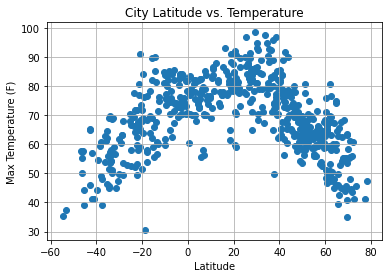

In [9]:
#Creating plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Temperature")
plt.savefig("..//output_data//Lat_vs_temp_plot")
plt.show()

## Latitude vs. Humidity Plot

The plot shows no correlation between latitude and humidity


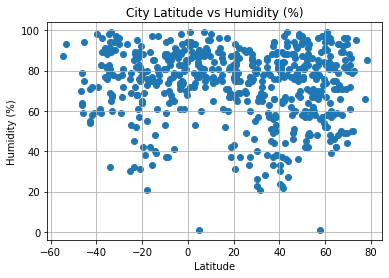

In [10]:
plt.scatter(pd.to_numeric(clean_city_data['Lat']), pd.to_numeric(clean_city_data['Humidity']))
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%)")
print("The plot shows no correlation between latitude and humidity")
plt.savefig("..//output_data//lat_vs_humid_plot")
plt.show()

## Latitude vs. Cloudiness Plot

The plot shows no correlation between latitude and cloudiness


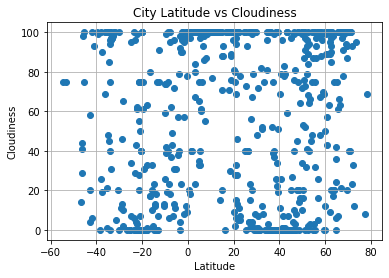

In [11]:
plt.scatter(pd.to_numeric(clean_city_data["Lat"]), pd.to_numeric(clean_city_data["Clouds"]))
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
print("The plot shows no correlation between latitude and cloudiness")
plt.savefig("..//output_data//lat_vs_cloud_plot")
plt.show()

## Latitude vs. Wind Speed Plot

The plot shows no correlation between latitude and wind speed


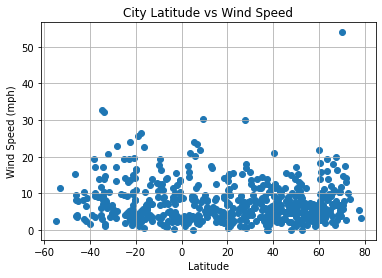

In [12]:
plt.scatter(pd.to_numeric(clean_city_data["Lat"]), pd.to_numeric(clean_city_data["Wind Speed"]))
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
print("The plot shows no correlation between latitude and wind speed")
plt.savefig("..//output_data//lat_vs_windspeed_plot")
plt.show()

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
north_h = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]) > 0, :]
south_h = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.4x + 86.5
The r-squared is: -0.6470304356475368
The regression equation shows a negative correlation.
The further away you get from the equator the colder the temperature gets.


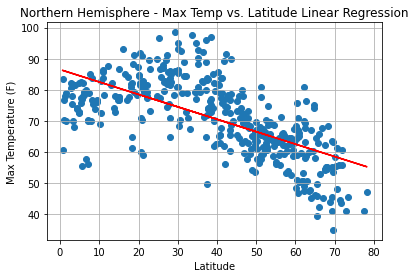

In [18]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = pd.to_numeric(north_h['Lat'])
y_values = pd.to_numeric(north_h['Max Temp'])

# Calc the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.grid()
plt.plot(x_values,regress_values,"r-")


# graph labels and findings
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression equation shows a negative correlation.")
print("The further away you get from the equator the colder the temperature gets.")
plt.savefig("..//output_data//north_max_temp_v_lat_plot")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.68x + 79.86
The r-squared is: 0.7213058413744498
The regression equation displays a positive correlation.
The closer away you get from the equator the warmer the temperature gets.


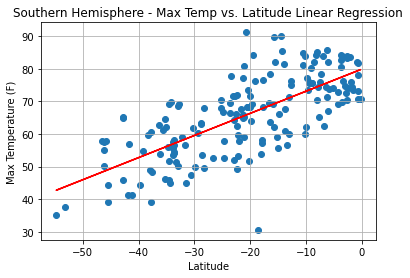

In [19]:
x_values = pd.to_numeric(south_h['Lat'])
y_values = pd.to_numeric(south_h['Max Temp'])

# Calc the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.grid()
plt.plot(x_values,regress_values,"r-")


# graph labels and findings
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation displays a positive correlation.")
print("The closer away you get from the equator the warmer the temperature gets.")
plt.savefig("..//output_data//south_max_temp_v_lat_plot")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.1x + 76.15
The r-squared is: -0.10613121359690823
The regression does not display a correlation betweenHumidity and Lat.


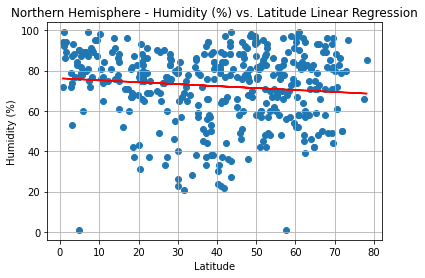

In [22]:
x_values = pd.to_numeric(north_h['Lat'])
y_values = pd.to_numeric(north_h['Humidity'])

# Calc the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.grid()
plt.plot(x_values,regress_values,"r-")


# graph labels and findings
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a correlation between Humidity and Lat.") 
plt.savefig("..//output_data//north_humid_v_lat_plot")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.1x + 71.54
The r-squared is: -0.06953607667957938
The regression equation does not indicate any correlation between humidity and latitude in the southern hemisphere.


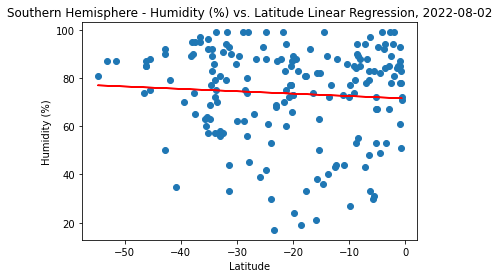

In [76]:
x_values = pd.to_numeric(south_h['Lat'])
y_values = pd.to_numeric(south_h['Humidity'])

# Calc the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.grid()
plt.plot(x_values,regress_values,"r-")


# graph labels and findings
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not display a correlation between Humidity and Lat.")
plt.savefig("..//output_data//south_humid_v_lat_plot")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 61.8
The r-squared is: -0.04413082546796477
The regression equation does not display a correlation between cloudiness and latitude.


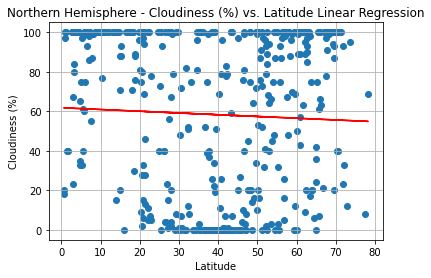

In [25]:
x_values = pd.to_numeric(north_h['Lat'])
y_values = pd.to_numeric(north_h['Clouds'])

# Calc the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.grid()
plt.plot(x_values,regress_values,"r-")


# graph labels and findings
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not display a correlation between cloudiness and latitude.")
plt.savefig("..//output_data//north_cloud_v_lat_plot")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.25x + 43.45
The r-squared is: -0.08540870022383969
The regression equations does not show a correlation between cloudiness and latitude in the southern hemisphere.


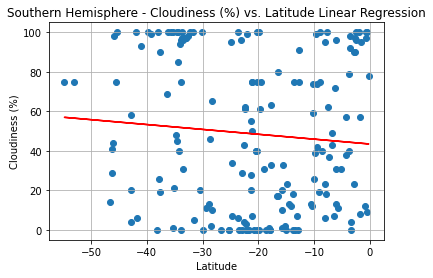

In [28]:
x_values = pd.to_numeric(south_h['Lat'])
y_values = pd.to_numeric(south_h['Clouds'])

# Calc the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.grid()
plt.plot(x_values,regress_values,"r-")


# graph labels and findings
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equations does not show a correlation between cloudiness and latitude.")
plt.savefig("..//output_data//south_cloud_v_lat_plot")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 6.8
The r-squared is: 0.03495511557446873
The regression equation does not display a correlation between wind speed and latitude in the northern hemisphere.


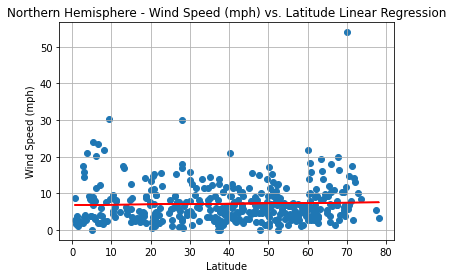

In [29]:
x_values = pd.to_numeric(north_h['Lat'])
y_values = pd.to_numeric(north_h['Wind Speed'])

# Calc the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.grid()
plt.plot(x_values,regress_values,"r-")

# graph labels and findings 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not display a correlation between wind speed and latitude in the northern hemisphere.")
plt.savefig("..//output_data//north_windspeed_v_lat_plot")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 7.41
The r-squared is: -0.1015105192305445
The regression equation does not show a correlation between wind speed and latitude.


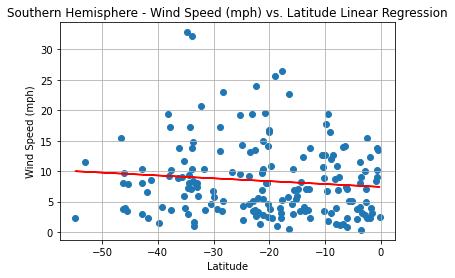

In [30]:
x_values = pd.to_numeric(south_h['Lat'])
y_values = pd.to_numeric(south_h['Wind Speed'])

# Calc the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.grid()
plt.plot(x_values,regress_values,"r-")


# graph labels and findings
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not show a correlation between wind speed and latitude.")
plt.savefig("..//output_data//south_windspeed_v_lat_plot")
plt.show()